In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv('zillow_rent_new_york.csv')

/Users/dzianissokalau/pyenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (22,24,31,36,48,49,57,58,60,62,78,85,86,87,89,100,102,111,113,120,126,127,136) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [172]:
df.head()

,Unnamed: 0,zpid,city,homeStatus,price,streetAddress,datePosted,zipcode,latitude,longitude,...,associationFeeIncludes,associationName,associationPhone,associationFee2,associationName2,associationPhone2,taxAssessedValue,taxAnnualAmount,listingId,buildingAreaSource
0,0,2076956072,Seymour,FOR_RENT,1195,38 Roberts St UNIT 2,1.607128e+12,6483.0,41.397774,-73.063408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170358964,NaN
1,0,163618788,Middletown,FOR_RENT,1850,827 Tower Ridge Cir,1.607089e+12,10941.0,41.402134,-74.305565,...,NaN,NaN,NaN,NaN,NaN,NaN,132200.0,NaN,NaN,NaN
2,0,2079100141,Seymour,FOR_RENT,2500,43 George St #10,1.607038e+12,6483.0,41.399323,-73.078079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170358719,NaN
3,0,57275656,Danbury,FOR_RENT,1500,10 Liberty St #C7,1.606952e+12,6810.0,41.393875,-73.451546,...,NaN,NaN,NaN,NaN,NaN,NaN,81300.0,2244.0,170358547,NaN
4,0,2076992413,Danbury,FOR_RENT,775,17 Kohanza St #2,1.606923e+12,6811.0,41.402252,-73.466637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
df = df.drop(columns='Unnamed: 0')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490 entries, 0 to 13489
Columns: 136 entries, zpid to buildingAreaSource
dtypes: bool(13), float64(60), int64(4), object(59)
memory usage: 12.8+ MB


In [175]:
def describe_df(df):
    counts = df.agg(['count', 'nunique']).transpose()
    types =  pd.DataFrame(df.dtypes)
    types.columns = ['types']
    res_info = types.merge(counts, left_index=True, right_index=True)   
    
    return res_info

In [176]:
res_info = describe_df(df)

pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)

res_info[res_info['count'] > 0]

,types,count,nunique
zpid,int64,13490,13490
city,object,13486,621
homeStatus,object,13490,2
price,int64,13490,908
streetAddress,object,13486,13482
datePosted,float64,13486,7534
zipcode,float64,13486,768
latitude,float64,13486,12693
longitude,float64,13486,11759
bedrooms,float64,13486,12


In [177]:
cols = [
    'zipcode',
    'bedrooms',
    'bathrooms',
    'hasHeating',
    'hasCooling',
    'furnished',
    'parking',
    'hasGarage',
    'hasSpa',
    'hasView',
    'homeType',
    'hasPetsAllowed',
    'yearBuilt',
    'yearBuiltEffective',
    'appliances',
    'livingArea',
    'laundryFeatures',
    'price'
]

df = df[cols]
df.head()

,zipcode,bedrooms,bathrooms,hasHeating,hasCooling,furnished,parking,hasGarage,hasSpa,hasView,homeType,hasPetsAllowed,yearBuilt,yearBuiltEffective,appliances,livingArea,laundryFeatures,price
0,6483.0,2.0,1.0,True,True,False,1,True,False,False,Apartment,False,1900.0,NaN,Dryer | Range / Oven | Refrigerator | Washer,800 sqft,In Unit,1195
1,10941.0,2.0,2.0,True,True,False,0,False,False,False,Apartment,False,2006.0,NaN,Dryer | Washer,"1,249 sqft",In Unit,1850
2,6483.0,2.0,2.0,True,True,False,2,True,False,False,Townhouse,False,2019.0,NaN,Dishwasher | Dryer | Microwave | Range / Oven | Refrigerator | Washer,"1,992 sqft",In Unit,2500
3,6810.0,2.0,1.0,True,True,False,0,False,False,False,Apartment,False,1993.0,NaN,Dishwasher | Range / Oven | Refrigerator,816 sqft,NaN,1500
4,6811.0,0.0,1.0,True,True,False,0,False,False,False,Apartment,False,NaN,NaN,NaN,350 sqft,NaN,775


In [178]:
df.isna().sum()

zipcode                   4
bedrooms                  4
bathrooms              1395
hasHeating                4
hasCooling                4
furnished                 0
parking                   0
hasGarage                 0
hasSpa                    0
hasView                   4
homeType                  0
hasPetsAllowed            0
yearBuilt              8837
yearBuiltEffective    12800
appliances             5807
livingArea             5950
laundryFeatures       10421
price                     0
dtype: int64

In [179]:
df = df[df.zipcode.isna() == False]

### Bathrooms

In [180]:
bathrooms = df[df.bathrooms.isna() == False].groupby('bedrooms')['bathrooms'].median().reset_index()

bathrooms_d = {}
for i in bathrooms.index:
    key = bathrooms.loc[bathrooms.index==i, 'bedrooms'].values[0]
    value = bathrooms.loc[bathrooms.index==i, 'bathrooms'].values[0]
    
    bathrooms_d[key] = value
    

def get_batrooms(x, d):
    if x in d.keys():
        value = d[x]
    elif x > np.max(list(d.keys())):
        value = np.max(list(d.values()))
    elif x < np.min(list(d.keys())):
        value = np.min(list(d.values()))
    else:
        value = np.median(list(bathrooms_d.values()))
    
    return value

In [181]:
df.loc[df.bathrooms.isna(), 'bathrooms'] = df.loc[df.bathrooms.isna(), 'bedrooms'].apply(lambda x: get_batrooms(x, bathrooms_d))

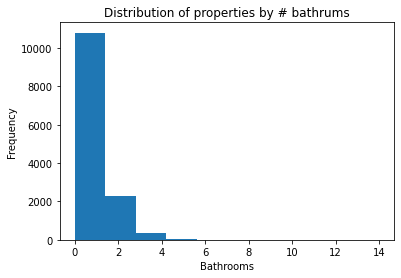

In [182]:
plt.hist(x=df.bathrooms)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of properties by # bathrums');

### hasHeating

In [183]:
df.groupby('hasHeating')['zipcode'].count()

hasHeating
False    9314
True     4172
Name: zipcode, dtype: int64

In [184]:
df['hasHeating'] = df.hasHeating.astype(np.int)

### hasCooling

In [185]:
df.groupby('hasCooling')['zipcode'].count()

hasCooling
False        6
True     13480
Name: zipcode, dtype: int64

In [186]:
df = df.drop(columns='hasCooling')

### hasSpa

In [187]:
df.groupby('hasSpa')['zipcode'].count()

hasSpa
False    13425
True        61
Name: zipcode, dtype: int64

In [188]:
df = df.drop(columns='hasSpa')

### furnished

In [189]:
df.groupby('furnished')['zipcode'].count()

furnished
False    13015
True       471
Name: zipcode, dtype: int64

In [190]:
df['furnished'] = df.furnished.astype(np.int)

### parking

In [191]:
df.groupby('parking')['zipcode'].count()

parking
0      11819
1        821
2        596
3        103
4         72
5         22
6         25
7          7
8          9
9          1
10         3
11         1
12         1
16         1
20         1
27         1
32         1
37         1
159        1
Name: zipcode, dtype: int64

### hasGarage

In [192]:
df.groupby('hasGarage')['zipcode'].count()

hasGarage
False    11819
True      1667
Name: zipcode, dtype: int64

## hasView

In [193]:
df.groupby('hasView')['zipcode'].count()

hasView
False    12951
True       535
Name: zipcode, dtype: int64

In [194]:
df = df.drop(columns='hasView')

### homeType

In [195]:
df.groupby('homeType')['zipcode'].count()

homeType
Apartment             2707
Condo                  832
Multiple Occupancy    7798
Single Family         1665
Townhouse              484
Name: zipcode, dtype: int64

### hasPetsAllowed

In [196]:
df.groupby('hasPetsAllowed')['zipcode'].count()

hasPetsAllowed
False    7771
True     5715
Name: zipcode, dtype: int64

In [197]:
df['hasPetsAllowed'] = df.hasPetsAllowed.astype(np.int)

### yearBuilt and yearBuiltEffective

In [198]:
df = df.drop(columns=['yearBuilt', 'yearBuiltEffective'])

### appliances

In [199]:
df.groupby('appliances')['zipcode'].count().reset_index().sort_values(by='zipcode', ascending=False).head(10)

,appliances,zipcode
0,Dishwasher,1856
87,Dryer | Washer,1113
39,Dishwasher | Dryer | Washer,1109
108,Range / Oven,736
109,Range / Oven | Refrigerator,380
27,Dishwasher | Dryer | Microwave | Range / Oven | Refrigerator | Washer,356
113,Refrigerator,342
34,Dishwasher | Dryer | Range / Oven | Refrigerator | Washer,241
67,Dishwasher | Range / Oven | Refrigerator,166
61,Dishwasher | Microwave | Range / Oven | Refrigerator,157


In [200]:
df['Dishwasher'] = df['appliances'].apply(lambda x: 1 if 'Dishwasher' in str(x) else 0)
df['Dryer'] = df['appliances'].apply(lambda x: 1 if 'Dryer' in str(x) else 0)
df['Washer'] = df['appliances'].apply(lambda x: 1 if 'Washer' in str(x) else 0)
df['Refrigerator'] = df['appliances'].apply(lambda x: 1 if 'Refrigerator' in str(x) else 0)
df['Range / Oven'] = df['appliances'].apply(lambda x: 1 if 'Range / Oven' in str(x) else 0)
df['Microwave'] = df['appliances'].apply(lambda x: 1 if 'Microwave' in str(x) else 0)

In [201]:
df = df.drop(columns='appliances')

### livingArea

In [202]:
df = df.drop(columns='livingArea')

### laundryFeatures

In [203]:
df.groupby('laundryFeatures')['zipcode'].count()

laundryFeatures
Hookups                       27
In Unit                     3041
Main Level | In the unit       1
Name: zipcode, dtype: int64

In [204]:
df['laundryFeatures'] = df['laundryFeatures'].isna().apply(lambda x: 1 if x == False else 0)

## One hot

In [206]:
df['zipcode'] = df['zipcode'].astype(np.int)

df = pd.get_dummies(
            data=df,
            columns=['zipcode', 'homeType'],
            prefix=['zipcode', 'homeType'])

## Modelling 

In [207]:
from sklearn.model_selection import train_test_split

y = df['price'].values
X = df.drop(columns = 'price').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Baseline

In [208]:
from sklearn.dummy import DummyRegressor

baseline_model_mean = DummyRegressor(strategy='mean')
baseline_model_mean.fit(X_train, y_train)


baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [209]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_train_pred = baseline_model_mean.predict(X_train)
mean_test_pred = baseline_model_mean.predict(X_test)

mean_train_MAE = mean_absolute_error(y_train, mean_train_pred)
mean_test_MAE = mean_absolute_error(y_test, mean_test_pred)

mean_train_RMSE = mean_squared_error(y_train, mean_train_pred, squared=False)
mean_test_RMSE = mean_squared_error(y_test, mean_test_pred, squared=False)

print('Strategy - Mean\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(mean_train_MAE, mean_train_RMSE, mean_test_MAE, mean_test_RMSE))

Strategy - Mean
Train: MAE 1055.4866177263045, RMSE 3581.4510141366504
Test: MAE: 1039.3627781005014, RMSE 3103.6156746131915


In [210]:
median_train_pred = baseline_model_median.predict(X_train)
median_test_pred = baseline_model_median.predict(X_test)

median_train_MAE = mean_absolute_error(y_train, median_train_pred)
median_test_MAE = mean_absolute_error(y_test, median_test_pred)

median_train_RMSE = mean_squared_error(y_train, median_train_pred, squared=False)
median_test_RMSE = mean_squared_error(y_test, median_test_pred, squared=False)

print('Strategy - Median\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(median_train_MAE, median_train_RMSE, median_test_MAE, median_test_RMSE))

Strategy - Median
Train: MAE 917.81255664497, RMSE 3617.2482975128714
Test: MAE: 903.1015567086731, RMSE 3143.7655031693625


### Ridge

In [211]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

ridge_train_pred = model_ridge.predict(X_train)
ridge_test_pred = model_ridge.predict(X_test)

ridge_train_MAE = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_MAE = mean_absolute_error(y_test, ridge_test_pred)

ridge_train_RMSE = mean_squared_error(y_train, ridge_train_pred, squared=False)
ridge_test_RMSE = mean_squared_error(y_test, ridge_test_pred, squared=False)

print('Ridge\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(ridge_train_MAE, ridge_train_RMSE, ridge_test_MAE, ridge_test_RMSE))

Ridge
Train: MAE 808.479884250179, RMSE 2932.3958721122267
Test: MAE: 819.068071210445, RMSE 2383.3808690562705


In [212]:
from sklearn.linear_model import RidgeCV

model_ridgeCV = RidgeCV(alphas=(0.1, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0), cv=10)
model_ridgeCV.fit(X_train, y_train)

ridgeCV_train_pred = model_ridge.predict(X_train)
ridgeCV_test_pred = model_ridge.predict(X_test)

ridgeCV_train_MAE = mean_absolute_error(y_train, ridgeCV_train_pred)
ridgeCV_test_MAE = mean_absolute_error(y_test, ridgeCV_test_pred)

ridgeCV_train_RMSE = mean_squared_error(y_train, ridgeCV_train_pred, squared=False)
ridgeCV_test_RMSE = mean_squared_error(y_test, ridgeCV_test_pred, squared=False)

print('RidgeCV\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(ridgeCV_train_MAE, ridgeCV_train_RMSE, ridgeCV_test_MAE, ridgeCV_test_RMSE))

RidgeCV
Train: MAE 808.479884250179, RMSE 2932.3958721122267
Test: MAE: 819.068071210445, RMSE 2383.3808690562705


### Lasso

In [213]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

lasso_train_pred = model_lasso.predict(X_train)
lasso_test_pred = model_lasso.predict(X_test)

lasso_train_MAE = mean_absolute_error(y_train, lasso_train_pred)
lasso_test_MAE = mean_absolute_error(y_test, lasso_test_pred)

lasso_train_RMSE = mean_squared_error(y_train, lasso_train_pred, squared=False)
lasso_test_RMSE = mean_squared_error(y_test, lasso_test_pred, squared=False)

print('Lasso\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(lasso_train_MAE, lasso_train_RMSE, lasso_test_MAE, lasso_test_RMSE))

Lasso
Train: MAE 826.6656320070415, RMSE 2969.147030356232
Test: MAE: 786.300749805999, RMSE 2384.567567371323


In [214]:
from sklearn.linear_model import LassoCV

model_lassoCV = LassoCV(eps=0.0001, cv=3, n_alphas=1000, max_iter=10000, random_state=42)
model_lassoCV.fit(X_train, y_train)

lassoCV_train_pred = model_lassoCV.predict(X_train)
lassoCV_test_pred = model_lassoCV.predict(X_test)

lassoCV_train_MAE = mean_absolute_error(y_train, lassoCV_train_pred)
lassoCV_test_MAE = mean_absolute_error(y_test, lassoCV_test_pred)

lassoCV_train_RMSE = mean_squared_error(y_train, lassoCV_train_pred, squared=False)
lassoCV_test_RMSE = mean_squared_error(y_test, lassoCV_test_pred, squared=False)

print('Lasso CV\nTrain: MAE {}, RMSE {}\nTest: MAE: {}, RMSE {}'.format(lassoCV_train_MAE, lassoCV_train_RMSE, lassoCV_test_MAE, lassoCV_test_RMSE))


Lasso CV
Train: MAE 828.0627681620796, RMSE 2971.844636625027
Test: MAE: 787.3007517584773, RMSE 2385.3390060584934
